# Individual Neuron Development

In [1]:
import sys
sys.path.insert(0, '/Users/amilmerchant/NEST/install/lib/python2.7/site-packages')
import nest
import pylab
import math

In [2]:
nest.ResetKernel()
nest.SetKernelStatus({"local_num_threads": 4})
nest.SetKernelStatus({"resolution": 0.2})

In [3]:
e_dict = {'V_m': -55.,
          'V_th': -50.,
          'V_peak': 0.,
          'V_reset': -55.,
          'C_m': 500.,
          'g_L': 25.,
          'E_L':-70.,
          'E_rev': [0., -70., 0.],
          'tau_rise' : [0.2, 0.5, 2.],
          'tau_decay' : [2., 5., 100.],
          'a' : 0.,
          'b' : 0.,
          'Delta_T' : 0.,
          'tau_w' : 1000.,
          't_ref' : 2.
         }

In [4]:
i_dict = {'V_m' : -55.,
          'V_th': -50.,
          'V_peak': 0.,
          'V_reset': -55.,
          'C_m': 200.,
          'g_L': 20.,
          'E_L':-70.,
          'E_rev': [0., -70., 0.],
          'tau_rise' : [0.2, 0.5, 2.],
          'tau_decay' : [2., 5., 100.],
          'a' : 0.,
          'b' : 0.,
          'Delta_T' : 0.,
          'tau_w' : 1000.,
          't_ref' : 1.
         }

In [5]:
N_e = 1600
N_i = 400
exc = nest.Create("aeif_cond_beta_multisynapse", N_e, e_dict)
inh = nest.Create("aeif_cond_beta_multisynapse", N_i, i_dict)

import random

a_group = exc[1360:1600]
b_group = exc[1120:1360]
non_ab_group = exc[:1120]

In [6]:
nest.CopyModel("static_synapse", "eAMPA", 
               {"weight": 1.0, 'receptor_type': 1,  'delay' : 0.5})
nest.CopyModel("static_synapse", "eGABA", 
               {"weight": 1.0, 'receptor_type': 2, 'delay': 0.5})
nest.CopyModel("static_synapse", "eNMDA", 
               {"weight": 1.0, 'receptor_type': 3, 'delay': 0.5})

In [7]:
back = nest.Create('poisson_generator', 1, {'rate': 2400.})

parrot_exc = nest.Create('parrot_neuron_ps', 1600)
parrot_inh = nest.Create('parrot_neuron_ps', 400)

conn_dict = {'rule': 'all_to_all'}

nest.Connect(back, parrot_exc, conn_dict, {'model': 'static_synapse'})
nest.Connect(back, parrot_inh, conn_dict, {'model': 'static_synapse'})

correction = (1 + 1 * math.exp(-0.062 * -55) / 3.57)
print correction

w_plus = 1.7
f = float(len(a_group)) /len(exc)
w_minus = 1 - f * (w_plus - 1) / (1 - f)

9.47765945641


In [8]:
nest.Connect(parrot_exc, exc, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 2.1})
nest.Connect(parrot_exc, exc, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.165 / correction})

nest.Connect(parrot_inh, inh, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 1.62 })
nest.Connect(parrot_inh, inh, {'rule': 'one_to_one'}, {'model': 'eNMDA', 'weight': 0.13 / correction})

In [9]:
nest.Connect(a_group, a_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 * w_plus})
nest.Connect(a_group, a_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 * w_plus / correction })

nest.Connect(b_group, b_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 * w_plus})
nest.Connect(b_group, b_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 * w_plus / correction})

nest.Connect(exc, inh, conn_dict, {'model': 'eAMPA', 'weight': 0.04 })
nest.Connect(exc, inh, conn_dict, {'model': 'eNMDA', 'weight': 0.13 / correction })

#nest.Connect(exc, exc, conn_dict, {'model': 'eAMPA', 'weight': 0.04 })
#nest.Connect(exc, exc, conn_dict, {'model': 'eNMDA', 'weight': 0.13 / correction })

nest.Connect(a_group, b_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 * w_minus})
nest.Connect(a_group, b_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 * w_minus / correction })

nest.Connect(b_group, a_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 * w_minus})
nest.Connect(b_group, a_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 * w_minus / correction })

nest.Connect(a_group, non_ab_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(a_group, non_ab_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })

nest.Connect(b_group, non_ab_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 })
nest.Connect(b_group, non_ab_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })

nest.Connect(non_ab_group, a_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 * w_minus})
nest.Connect(non_ab_group, a_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 * w_minus / correction })

nest.Connect(non_ab_group, b_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05 * w_minus})
nest.Connect(non_ab_group, b_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165 * w_minus / correction })

nest.Connect(non_ab_group, non_ab_group, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(non_ab_group, non_ab_group, conn_dict, {'model': 'eNMDA', 'weight': 0.165/ correction })

nest.Connect(inh, exc, conn_dict, {'model': 'eGABA', 'weight': 1.3 })

nest.Connect(inh, inh, conn_dict, {'model': 'eGABA', 'weight': 1.0})

In [10]:
coherence = 52
u_a = 40 + 40 * coherence / 100.
u_b = 40 - 40 * coherence / 100.
print u_a
print u_b

input_left = nest.Create('poisson_generator', 1, {'rate': u_a})
input_right = nest.Create('poisson_generator', 1, {'rate': u_b})

nest.Connect(input_left, a_group, conn_dict, {'model': 'eAMPA', 'weight': 2.1 })
nest.Connect(input_right, b_group, conn_dict, {'model': 'eAMPA', 'weight': 2.1 })

60.8
19.2


In [11]:
multis = []
for i in exc:
    multimeter = nest.Create("multimeter")
    multis.append(multimeter)
    nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
    nest.Connect(multimeter, [i])

spikedetector = nest.Create("spike_detector",
                params={"withgid": True, "withtime": True})
nest.Connect(exc, spikedetector)

In [12]:
import nest.raster_plot

pops = [a_group, b_group, exc, inh]
sds = []
for i in range(len(pops)):
    sds.append(nest.Create("spike_detector",
                params={"withtime": True}))
    nest.Connect(pops[i], sds[i])

In [13]:
import time
start = time.time()
nest.Simulate(1000.0)
end = time.time()
print end - start

48.2685158253


-62.1758138124
-61.8344358905


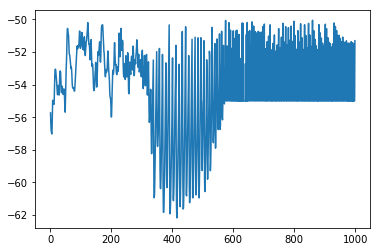

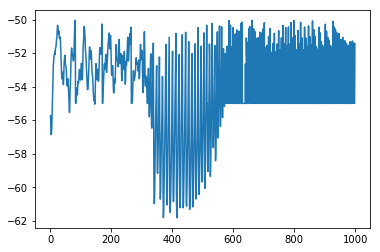

In [14]:
import pylab
for i in range(2): 
    dmm = nest.GetStatus(multis[i])[0]
    Vms = dmm["events"]["V_m"]
    ts = dmm["events"]["times"]
    pylab.ion()
    pylab.figure(i+1)
    pylab.plot(ts, Vms)
    print min(Vms)

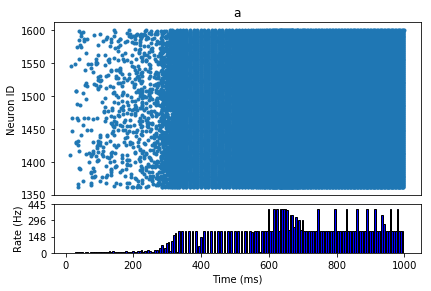

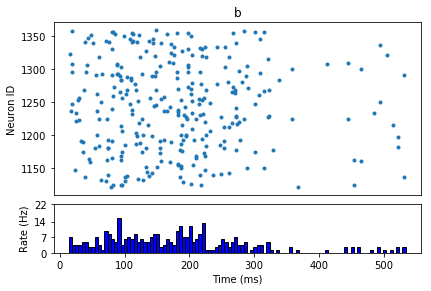

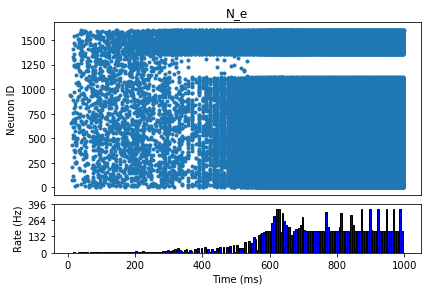

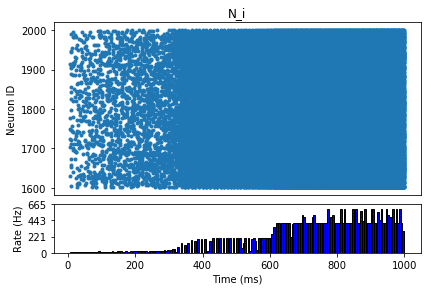

In [15]:
names = ["a", "b", "N_e", "N_i"]
for i in range(len(sds)):
    dSD = nest.GetStatus(sds[i],keys="events")[0]
    if len(dSD['senders']) == 0:
        print names[i], "0 fires"
    else:
        nest.raster_plot.from_device(sds[i], hist=True,
                                 title=names[i])